<a href="https://colab.research.google.com/github/NandakumarGunalan/MLLaboratory/blob/main/lec3_categorical_encoding_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3: Categorical Encoding
This notebook demonstrates different techniques for encoding categorical variables using a public dataset (Titanic dataset from Seaborn).

The Titanic dataset is used to predict passenger survival after the Titanic disaster.
This is a binary classification problem — the goal is to build a model that predicts whether a passenger survived (1) or did not survive (0) based on their personal and travel information.

Features (Inputs)

These are the variables you use to make predictions:

pclass — Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex — Gender (male/female)

age — Age in years

sibsp — Number of siblings/spouses aboard

parch — Number of parents/children aboard

fare — Ticket fare paid

embarked — Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

deck, class, who, alone, etc. — Additional categorical attributes derived from the main ones

Target (Output)

survived — Whether the passenger survived (1) or not (0)

Use the features to train a model that predicts survived.
Before that, you must encode categorical features (like sex, embarked, class) — that’s the focus of this notebook.

In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Overview

In [ ]:

# Basic info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Game    5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


,0
Game,0


## Selecting Categorical Columns

We want to find all the categorical columns in our dataset — i.e., the columns that contain text labels like "male", "female", "S", "C", "Q", etc.
These columns must be encoded before machine learning models can use them.

Machine learning models can only work with numeric data, not text.

Before training a model, we must convert these text categories into numbers — this process is called encoding categorical features.

In [ ]:

# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['Game']

In [ ]:
#numerical_cols = df.select_dtypes(include=['number']).columns.tolist()


### Example categorical columns

In [ ]:
# Look at unique values for some columns
for col in categorical_cols[:5]:
    print(f"{col}: {df[col].unique()}\n")


Game: ['football' 'chess' 'soccer']



## Label Encoding

LabelEncoder is a simple tool from sklearn.preprocessing that converts categorical text labels into numeric codes.

In [ ]:

# Create a copy
df_label = df.copy()
# Apply LabelEncoder to all categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_label[col] = df_label[col].astype(str)  # ensure string type
    df_label[col] = le.fit_transform(df_label[col])
df_label.head()


,Game
0,1
1,0
2,2
3,0
4,1


## One-Hot Encoding

pd.get_dummies() automatically converts categorical columns into numeric “dummy” (0/1) columns — one for each category.


columns=categorical_cols tells pandas which columns to encode.


drop_first=True removes one dummy column per feature to avoid redundancy (the “dummy variable trap”).

df_onehot becomes a fully numeric DataFrame, where:

All categorical variables are replaced with their dummy-coded (0/1) counterparts, and

It’s ready to be fed directly into a machine learning model.

It leaves boolean columns unchanged, because they are already numeric under the hood (Python treats True = 1, False = 0).

For columns in categorical_cols (like sex, embarked, class),
pd.get_dummies() creates new binary columns like:

sex_male (1 if male, 0 if female)

embarked_Q, embarked_S, etc.

These are typically numeric (int64), but they may display as True/False in some outputs (especially in notebooks) because pandas automatically infers boolean dtype when values are only 0/1.

In [ ]:
categorical_cols

['Game']

pd.get_dummies(df, ...)

This function performs One-Hot Encoding automatically.

It looks at the columns you list in columns=categorical_cols and:

Replaces each categorical column with new binary (0/1) columns — one for each unique category.

drop_first=True

This tells pandas to drop one dummy column per feature to avoid the dummy variable trap (perfect multicollinearity in regression models).

So instead of both sex_male and sex_female, you’ll just get sex_male —
where 1 means male, and 0 means female.

In [ ]:

# One-hot encoding using pandas
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_onehot.head()


,Game_football,Game_soccer
0,True,False
1,False,False
2,False,True
3,False,False
4,True,False


`Label Encoding`
Converts each unique category into a unique integer (e.g., "red" → 0, "green" → 1, "blue" → 2).




Used when the categorical variable is nominal — meaning the categories have no natural order.
Examples:

color = ["red", "green", "blue"]

city = ["Paris", "Tokyo", "Cairo"]

Issue:
Some models (especially linear models and distance-based ones like KNN or SVM) may misinterpret the numbers as ordered (thinking 2 > 1 > 0), which is not true for nominal data.

Also assigns integers to categories, but with meaningful order — respecting a ranking or hierarchy.

Example:
education = ["High School" → 0, "Bachelor" → 1, "Master" → 2, "PhD" → 3]


Used for ordinal categorical variables, where categories have a natural order but not necessarily equal spacing.
Examples:

Education level

Satisfaction rating ("Low", "Medium", "High")

Size ("Small", "Medium", "Large")

## Ordinal Encoding

Ordinal Encoding converts each category (text label) into a numeric code — usually 0, 1, 2, … for however many unique categories exist in that column.


So instead of having text labels, the model sees integers.
This is useful for:

Ordinal data — categories that have a natural order (like small < medium < large).

Sometimes as a quick encoding step for all categorical features before trying other encoders.

df_ordinal becomes a numeric-only DataFrame, just like with one-hot encoding —
but here, each categorical column is replaced by a single integer column, rather than multiple 0/1 columns.

In [ ]:

from sklearn.preprocessing import OrdinalEncoder

# Copy again
df_ordinal = df.copy()
from sklearn.preprocessing import OrdinalEncoder

# Copy again
df_ordinal = df.copy()

# Convert categorical columns to string before filling missing
df_ordinal[categorical_cols] = df_ordinal[categorical_cols].astype(str)
df_ordinal[categorical_cols] = df_ordinal[categorical_cols].fillna('Missing')

# Ordinal encode
oe = OrdinalEncoder()
df_ordinal[categorical_cols] = oe.fit_transform(df_ordinal[categorical_cols])

df_ordinal.head()

# Fill missing categorical values
df_ordinal[categorical_cols] = df_ordinal[categorical_cols].fillna('Missing')

# Ordinal encode
oe = OrdinalEncoder()
df_ordinal[categorical_cols] = oe.fit_transform(df_ordinal[categorical_cols])

df_ordinal.head()


,Game
0,1.0
1,0.0
2,2.0
3,0.0
4,1.0


## Comparison Summary

In [ ]:

print("Original shape:", df.shape)
print("After Label Encoding:", df_label.shape)
print("After One-Hot Encoding:", df_onehot.shape)
print("After Ordinal Encoding:", df_ordinal.shape)


Original shape: (891, 15)
After Label Encoding: (891, 15)
After One-Hot Encoding: (891, 24)
After Ordinal Encoding: (891, 15)


### Summary
- **Label Encoding:** Converts categories to numeric labels (useful for ordinal data).
- **One-Hot Encoding:** Creates binary columns for each category (useful for nominal data).
- **Ordinal Encoding:** Encodes categories into ordered integers.

This workflow can be applied to any dataset with categorical features.

Use LabelEncoder for the target column (y).

Use One-Hot when categories don’t have order.

Use Ordinal when categories do have order (like "Low < Medium < High").

# `Question 1`
# Can we assign categories to Ordinal method

Example: Let say I have some data that follows a speccifc order or rankinking for example i have: My faviourts games Rank: ['chess' , 'football', 'soccer'] how do i define my own order?

In [ ]:
# this is my features column from my data:
df = pd.DataFrame({
    'Game': ['football', 'chess', 'soccer', 'chess', 'football']
})

My personal ranking:   (for students: try to create your own ranking or add more games)
   




*   'chess' : rank 0 (most favorite).
*   'football' → rank 1.
* 'soccer' → rank 2 (least favorite).



In [ ]:
# Define your order (this is my specific order)
my_order = [['chess', 'football', 'soccer']]

In [ ]:
# Create encoder and fit-transform
encoder = OrdinalEncoder(categories=my_order)
encoded = encoder.fit_transform(df[['Game']])


In [ ]:

# Add encoded column back to dataframe
df['Game_encoded'] = encoded
print(df)

       Game  Game_encoded
0  football           1.0
1     chess           0.0
2    soccer           2.0
3     chess           0.0
4  football           1.0


In [ ]:
#@title Mlflow
!pip install mlflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

`Question 2`: Connect to Google drive to save our expeiments their

1. Proper URI scheme (file:/// + absolute path)

2. Use (mlflow.set_experiment("wine_experiment")

)to organize runs inside MLflow under a specific experiment name



In [ ]:

# Copy path from your own drive:  file:/// + your own path
mlflow.set_tracking_uri("file:///content/drive/MyDrive/MLFLOW")
mlflow.set_experiment("wine_experiment")

# Enable autologging for scikit-learn
mlflow.sklearn.autolog()

# Load sample data
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42
)

# Train your model - MLflow automatically logs everything
with mlflow.start_run():
    model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Evaluation metrics are automatically captured
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Training accuracy: {train_score:.3f}")
    print(f"Test accuracy: {test_score:.3f}")

2025/11/03 23:45:54 INFO mlflow.tracking.fluent: Experiment with name 'wine_experiment' does not exist. Creating a new experiment.


Training accuracy: 0.993
Test accuracy: 1.000


Once you run the code go to your drive...your folder path and check the results. 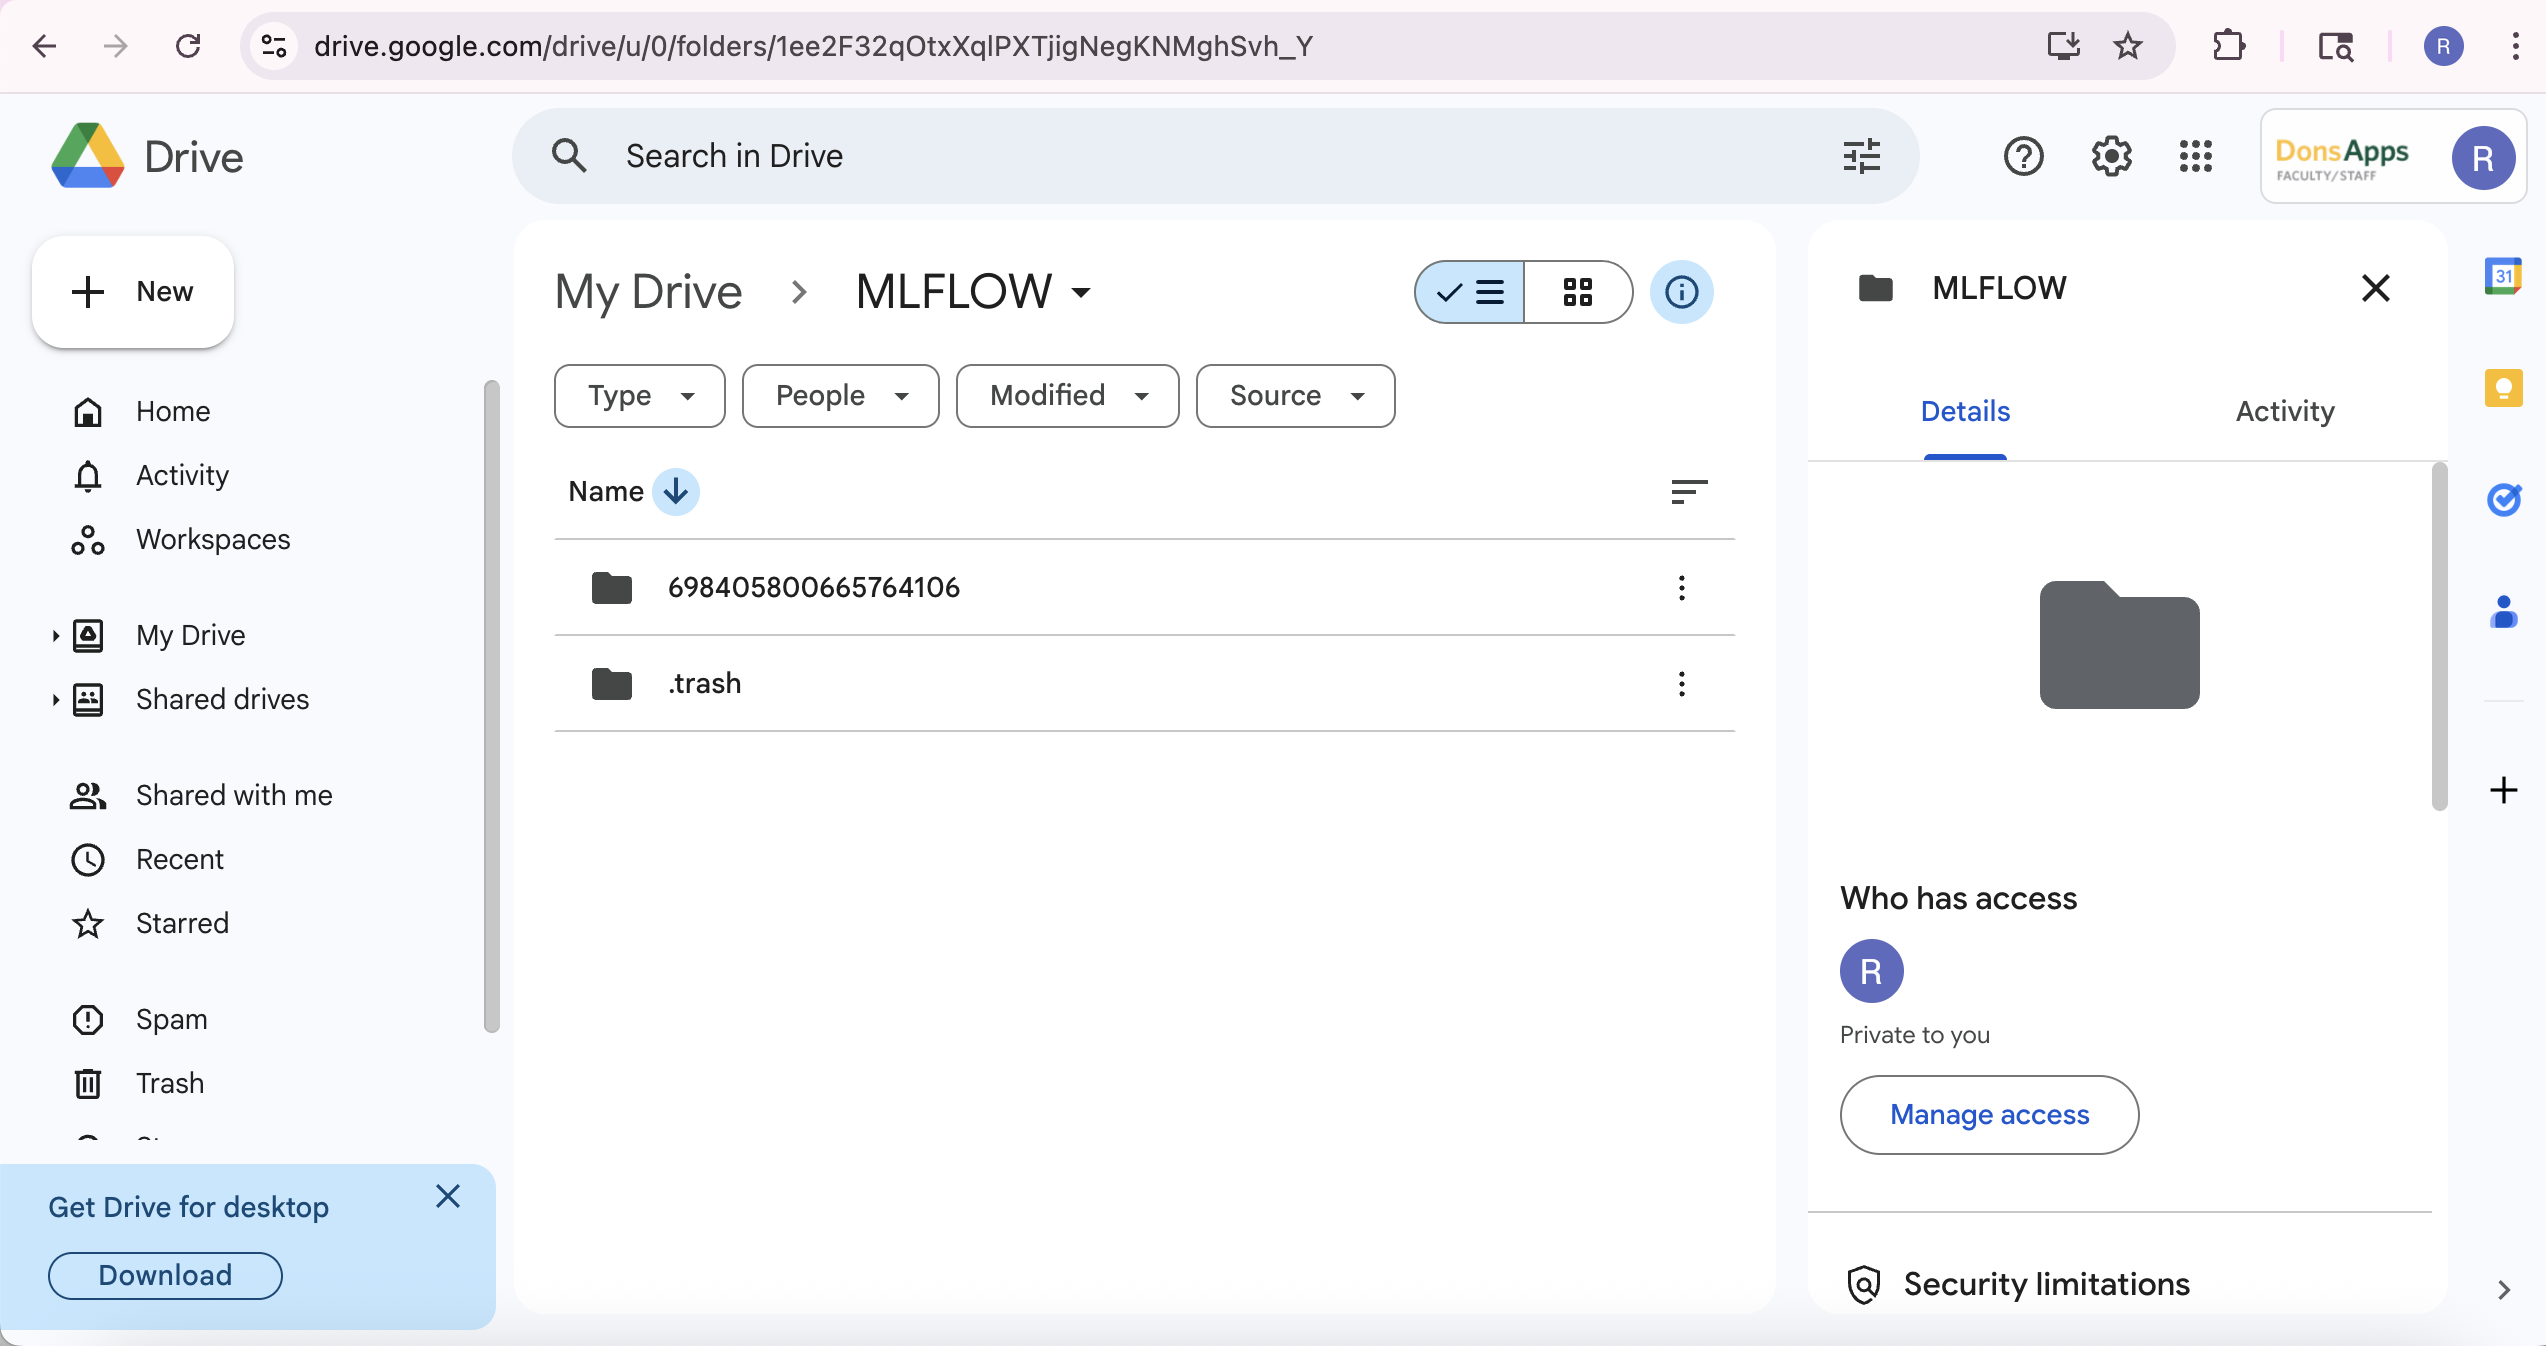

By default, MLflow saves runs locally under:

./mlruns/

This folder is created in the same directory where you ran the notebook.

Inside it, you’ll see subfolders like:

mlruns/        
└── 0/         
    ├── meta.yaml      
    ├── metrics/        
    ├── params/        
    ├── artifacts/          

In [ ]:
# View all past runs
runs_df = mlflow.search_runs()
runs_df.head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_f1_score,metrics.RandomForestClassifier_score-2_X_test,metrics.training_log_loss,metrics.training_precision_score,...,params.max_depth,params.min_weight_fraction_leaf,params.warm_start,params.random_state,tags.mlflow.source.name,tags.estimator_class,tags.mlflow.user,tags.mlflow.runName,tags.estimator_name,tags.mlflow.source.type
0,4d075832f0cb46e89294da132549b496,0,FINISHED,file:///content/mlruns/0/4d075832f0cb46e89294d...,2025-11-03 17:32:09.038000+00:00,2025-11-03 17:32:15.546000+00:00,0.992965,1.0,0.116652,0.993111,...,3,0.0,False,42,/usr/local/lib/python3.12/dist-packages/colab_...,sklearn.ensemble._forest.RandomForestClassifier,root,clumsy-skink-852,RandomForestClassifier,LOCAL
